# **Project Name    - Cardiovascular Risk Prediction**



##### **Project Type**    - Classification Algorithm
##### **Contribution**    - Team
M Jeevan-RollNo-22H51A6739

O Shiva Kumar Reddy-RollNo-22H51A6740

P Rakesh-RollNo-22H51A6741

P Pavan Sai-RollNo-22H51A6742

# **Project Summary -**

The project aims to predict the 10-year risk of future coronary heart disease (CHD) for patients in Framingham, Massachusetts. A dataset containing demographic, behavioral, and medical risk factors for over 4000 patients is used to build a predictive model. The model will use machine learning techniques to analyze the provided information and make accurate CHD risk predictions. The goal of the project is to develop a tool for early detection and prevention of CHD, addressing a significant public health concern. The outcome of the project will be a predictive model that can be used by healthcare providers to make informed decisions regarding patient care.

* There were approximately 3390 records and 16 attributes in the dataset.
* We started by importing the dataset, and necessary libraries and conducted exploratory data analysis (EDA).
* Outliers and null values were removed from the raw data and treated. Data were transformed to ensure that it was compatible with machine learning models.
* We handled target class imbalance using SMOTE.
* Then finally cleaned and scaled data was sent to 8 various models, the metrics were made to evaluate the model, and we tuned the hyperparameters to make sure the right parameters were being passed to the model.
* When developing a machine learning model, it is generally recommended to track multiple metrics because each one highlights distinct aspects of model performance. We are, focusing more on the Recall score and F1 score.
* It is categorically unacceptable to miss identifying a particular patient or to classify a particular patient as healthy (false negative). That is why we have preferred recall score.

# **PROBLEM STATEMENT -**
To develop a predictive model for assessing the 10-year risk of coronary heart disease (CHD) in patients from Framingham, Massachusetts, based on demographic, behavioral, and medical risk factors. The project aims to analyze a dataset of over 3000 patient records, focusing on minimizing false negatives to prevent missed high-risk cases. By prioritizing metrics like Recall and F1 score, the model will enhance the early detection of CHD risk, helping healthcare providers make more informed, preventive care decisions and address an essential public health concern.

# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries

In [ ]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Impoting data preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing model selection libraries.
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Importing metrics for model evaluation.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay # Instead of plot_confusion_matrix, use ConfusionMatrixDisplay

# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing SMOTE for handling class imbalance.
from imblearn.over_sampling import SMOTE

# Importing warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Dataset Loading

In [ ]:
# load the CARDIOVASCULAR RISK DATA from the drive
risk_df = pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Viewing the top 5 rows to take a glimpse of the data
risk_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Viewing the last 5 rows
risk_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns Count

In [ ]:
# Dataset Rows & Columns
risk_df.shape

(3390, 17)

In [ ]:
print(f'number of rows : {risk_df.shape[0]}  \nnumber of columns : {risk_df.shape[1]}')

number of rows : 3390  
number of columns : 17


### Dataset Information

In [ ]:
# Dataset Info
risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

### Duplicate Values

In [ ]:
# Checking Duplicate Values
value = len(risk_df[risk_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(risk_df.isnull().sum())

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [ ]:
# Missing Values Percentage
round(risk_df.isna().sum()/len(risk_df)*100, 2)

,0
id,0.00
age,0.00
education,2.57
sex,0.00
is_smoking,0.00
cigsPerDay,0.65
BPMeds,1.30
prevalentStroke,0.00
prevalentHyp,0.00
diabetes,0.00


<Axes: >

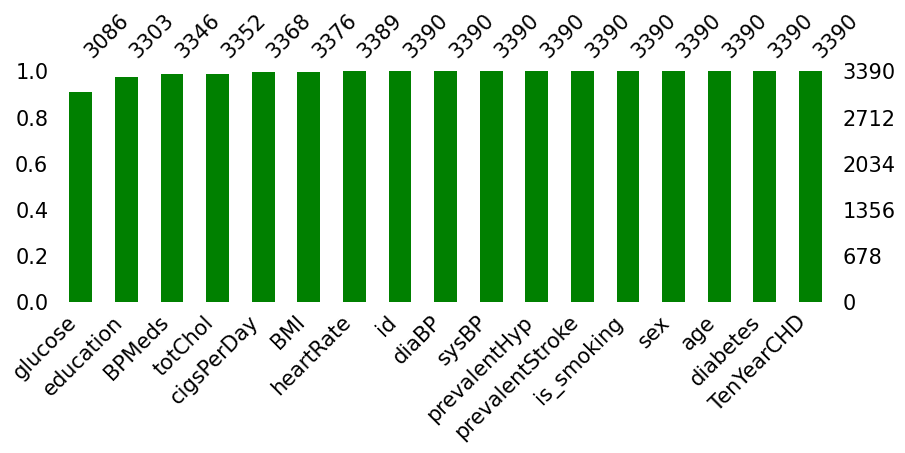

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(risk_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

<Axes: >

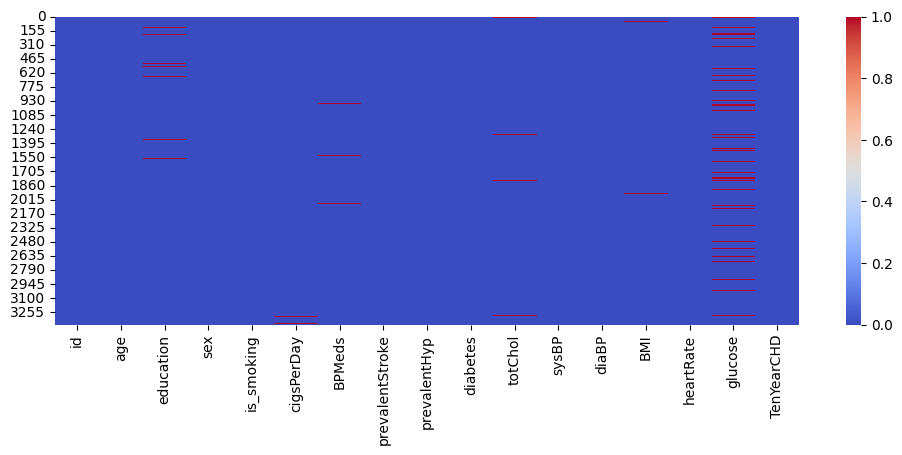

In [ ]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(risk_df.isna(), cmap = 'coolwarm')

In [ ]:

risk_df.dropna(inplace=True)



<Axes: >

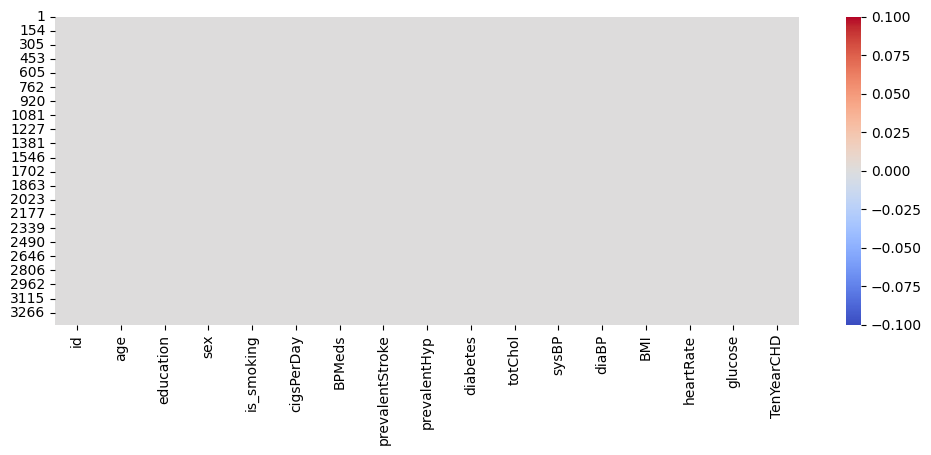

In [ ]:
plt.figure(figsize=(12,4))
sns.heatmap(risk_df.isna(), cmap = 'coolwarm')

## **2. Understanding Your Variables**

###  Columns

In [ ]:
# Dataset Columns
risk_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

###  Statistical Summary

In [ ]:
# Dataset Describe    (used to get statistics of numerical columns)
risk_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2927.0,1692.869833,986.025198,1.00,836.50,1689.00,2547.50,3389.0
age,2927.0,49.507345,8.597191,32.00,42.00,49.00,56.00,70.0
education,2927.0,1.965494,1.017199,1.00,1.00,2.00,3.00,4.0
cigsPerDay,2927.0,9.112743,11.882784,0.00,0.00,0.00,20.00,70.0
BPMeds,2927.0,0.030065,0.170795,0.00,0.00,0.00,0.00,1.0
prevalentStroke,2927.0,0.006150,0.078192,0.00,0.00,0.00,0.00,1.0
prevalentHyp,2927.0,0.314315,0.464322,0.00,0.00,0.00,1.00,1.0
diabetes,2927.0,0.026990,0.162082,0.00,0.00,0.00,0.00,1.0
totChol,2927.0,237.129142,44.613282,113.00,206.00,234.00,264.00,600.0
sysBP,2927.0,132.626409,22.326197,83.50,117.00,128.50,144.00,295.0


### Unique Values

In [ ]:
# Check Unique Values for each variable.
for i in risk_df.columns.tolist():
  print("No. of unique values in",i,"is",risk_df[i].nunique())

No. of unique values in id is 2927
No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 31
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 232
No. of unique values in sysBP is 222
No. of unique values in diaBP is 138
No. of unique values in BMI is 1195
No. of unique values in heartRate is 67
No. of unique values in glucose is 127
No. of unique values in TenYearCHD is 2


#  **3.DATA WRANGLING**

In [ ]:
numeric_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 10 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in risk_df.columns:
  if risk_df[col].nunique() > 10:
    numeric_features.append(col)
  else:
    categorical_features.append(col)

print(f'numeric feature : {numeric_features}')
print(f'category feature : {categorical_features}')

numeric feature : ['id', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
category feature : ['prevalentStroke', 'TenYearCHD', 'education_2.0', 'education_3.0', 'education_4.0', 'BPMeds_1.0', 'prevalentHyp_1', 'diabetes_1', 'sex_M']


In [ ]:
# Check if the column name is 'gender' or something else (e.g., 'sex')
print(risk_df.columns)  # Print the columns of the DataFrame to verify

# If the column name is different, update categorical_features:
categorical_features = ['education', 'BPMeds', 'prevalentHyp', 'diabetes', 'sex'] # Replace 'sex' with the actual column name

# Proceed with one-hot encoding
risk_df = pd.get_dummies(risk_df, columns=categorical_features, drop_first=True)

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [ ]:
risk_df.isna().sum()

,0
id,0
age,0
is_smoking,0
cigsPerDay,0
prevalentStroke,0
totChol,0
sysBP,0
diaBP,0
BMI,0
heartRate,0


In [ ]:
# copying the data to save the work done till now
model_df = risk_df.copy()
model_df.head(3)

,id,age,is_smoking,cigsPerDay,prevalentStroke,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_2.0,education_3.0,education_4.0,BPMeds_1.0,prevalentHyp_1,diabetes_1,sex_M
1,1,36,NO,0.0,0,212.0,168.0,98.0,29.77,72.0,75.0,0,False,False,True,False,True,False,True
2,2,46,YES,10.0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,False,False,False,False,False,False,False
3,3,50,YES,20.0,0,233.0,158.0,88.0,28.26,68.0,94.0,1,False,False,False,False,True,False,True


In [ ]:
risk_df[(risk_df.is_smoking == 'YES') & (risk_df.cigsPerDay == 0)]

,id,age,is_smoking,cigsPerDay,prevalentStroke,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_2.0,education_3.0,education_4.0,BPMeds_1.0,prevalentHyp_1,diabetes_1,sex_M


In [ ]:
risk_df.drop('is_smoking', axis=1, inplace=True)

In [ ]:
X = model_df.drop(columns='TenYearCHD')     # independent features
y = model_df['TenYearCHD']                  # dependent features

# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

CHART- 1

In [ ]:
missing_values = risk_df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)

# Check if missing_values is empty before plotting
if missing_values.empty:
    print("No missing values found in the DataFrame.")
else:
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar', color='skyblue')
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Percentage of Missing Values')
    plt.title('Missing Values Distribution')
    plt.show()

No missing values found in the DataFrame.


CHART- 2

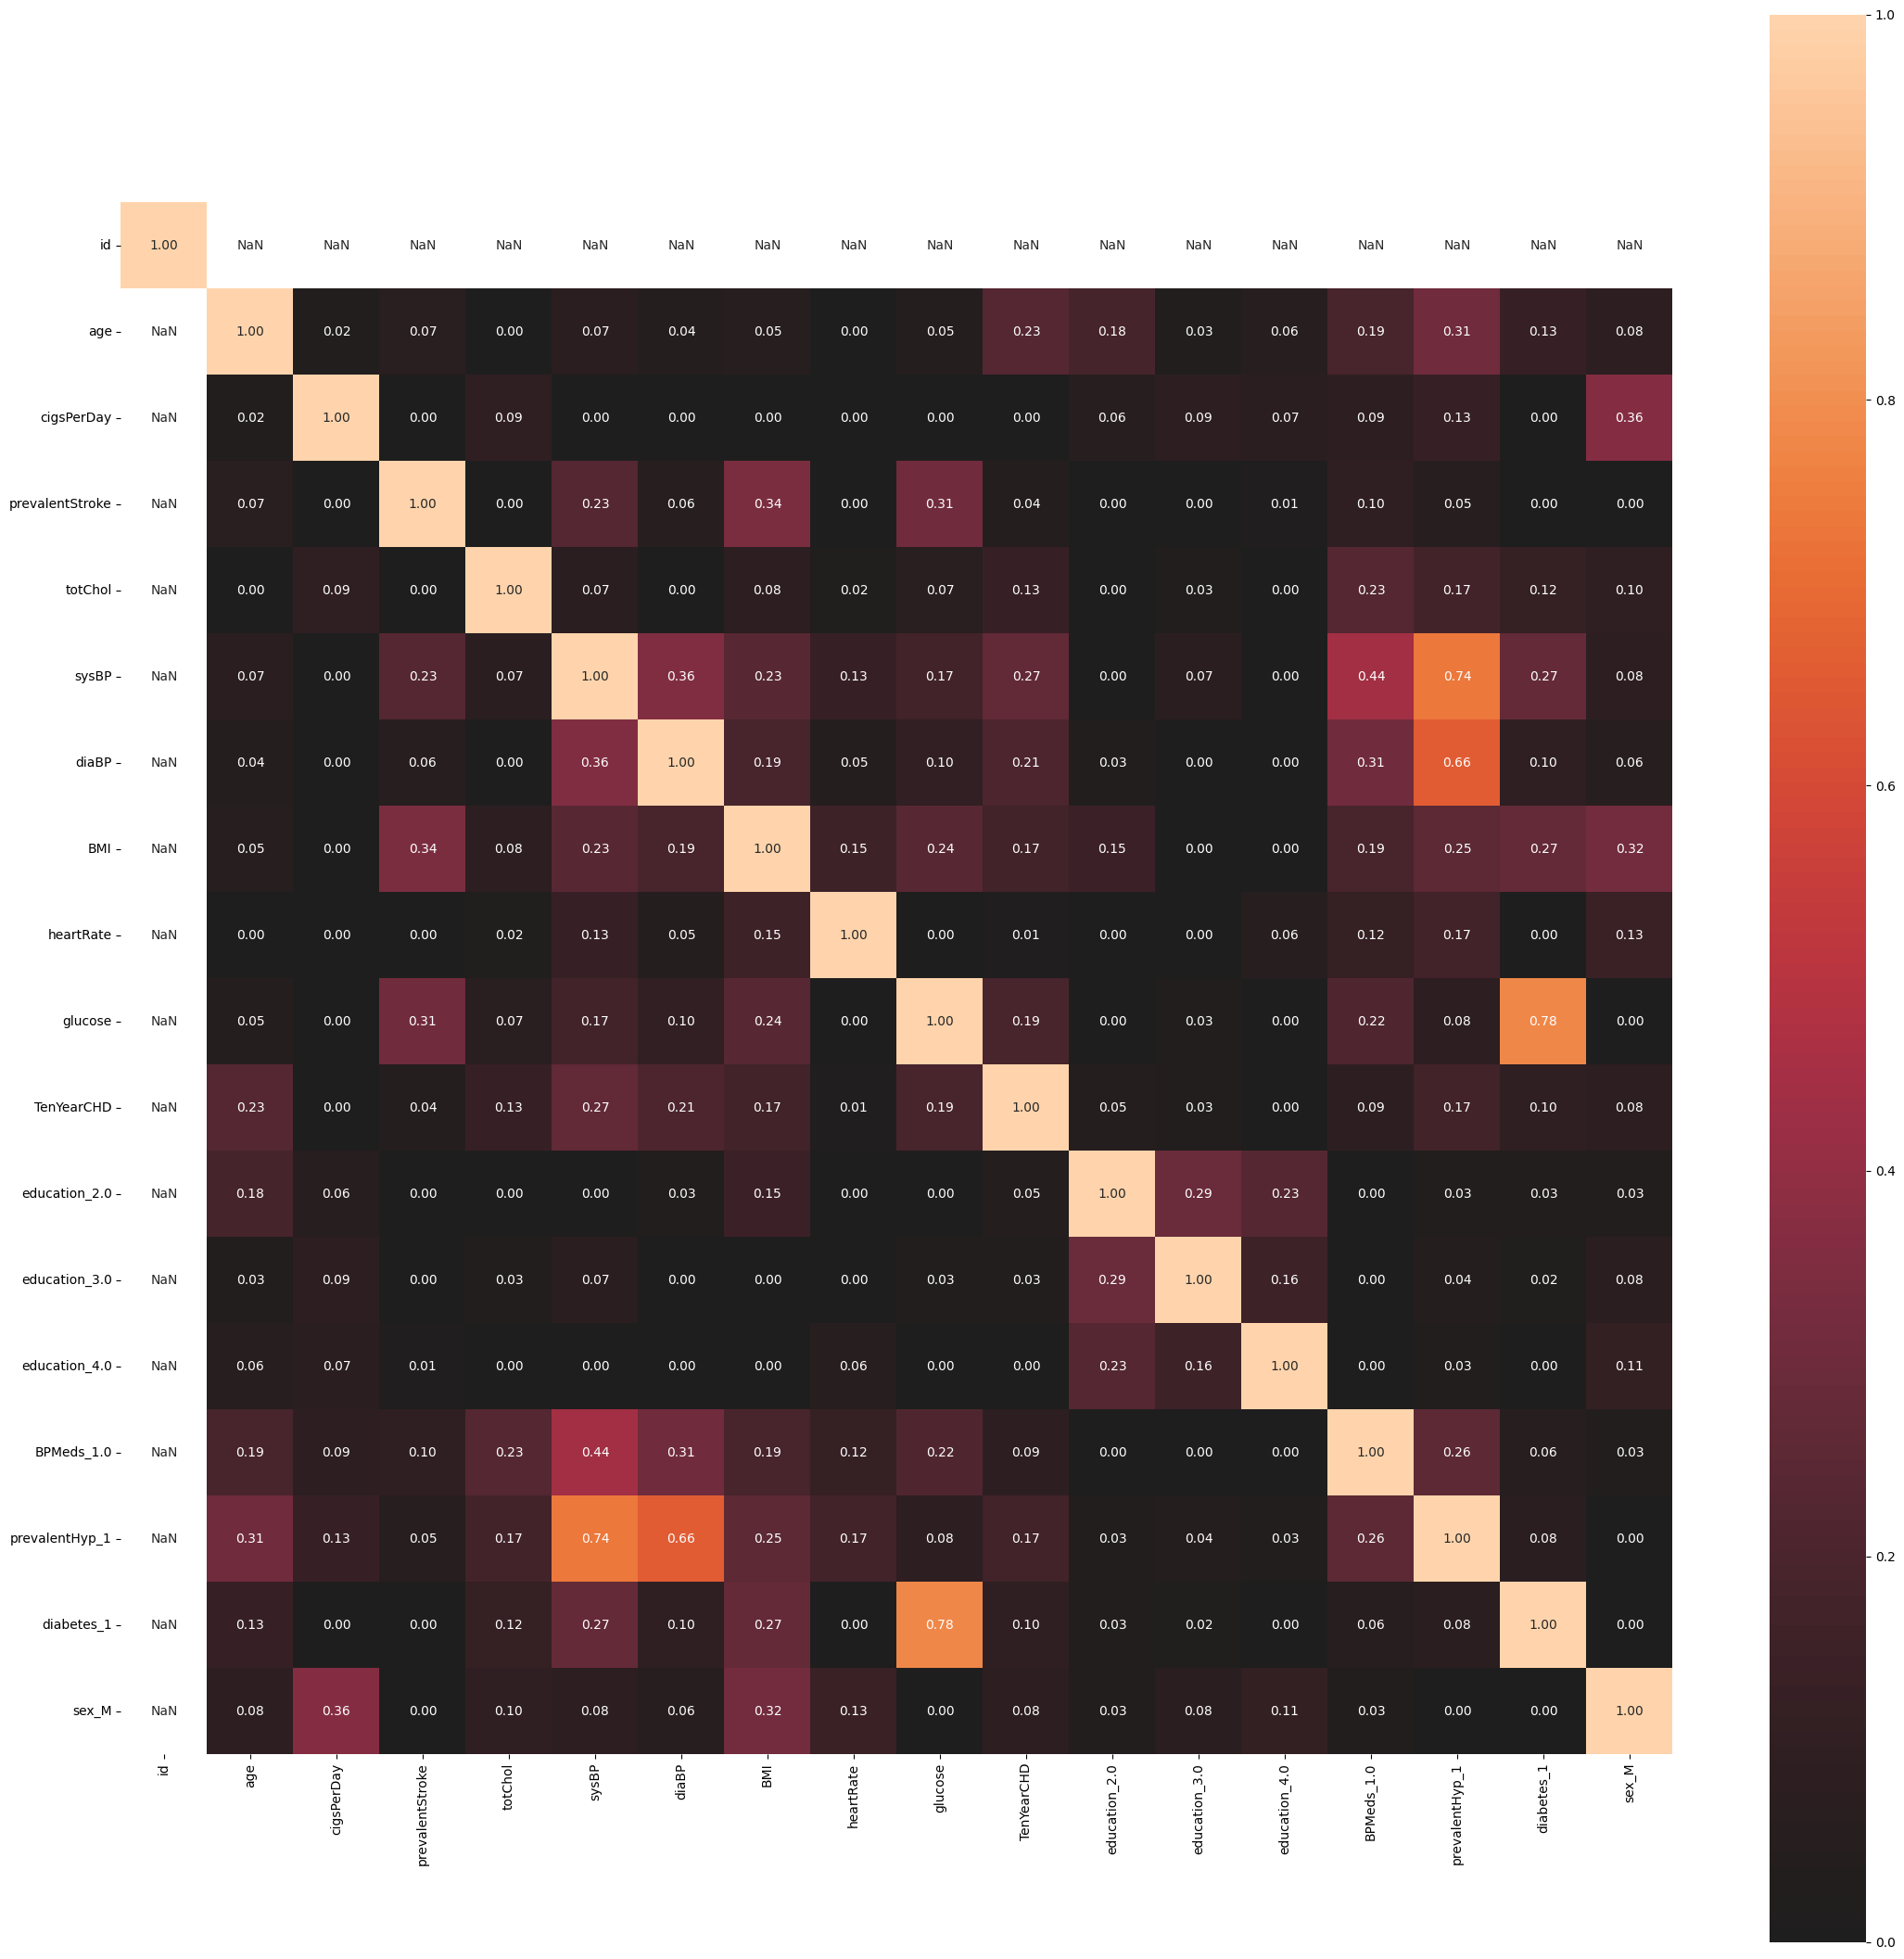

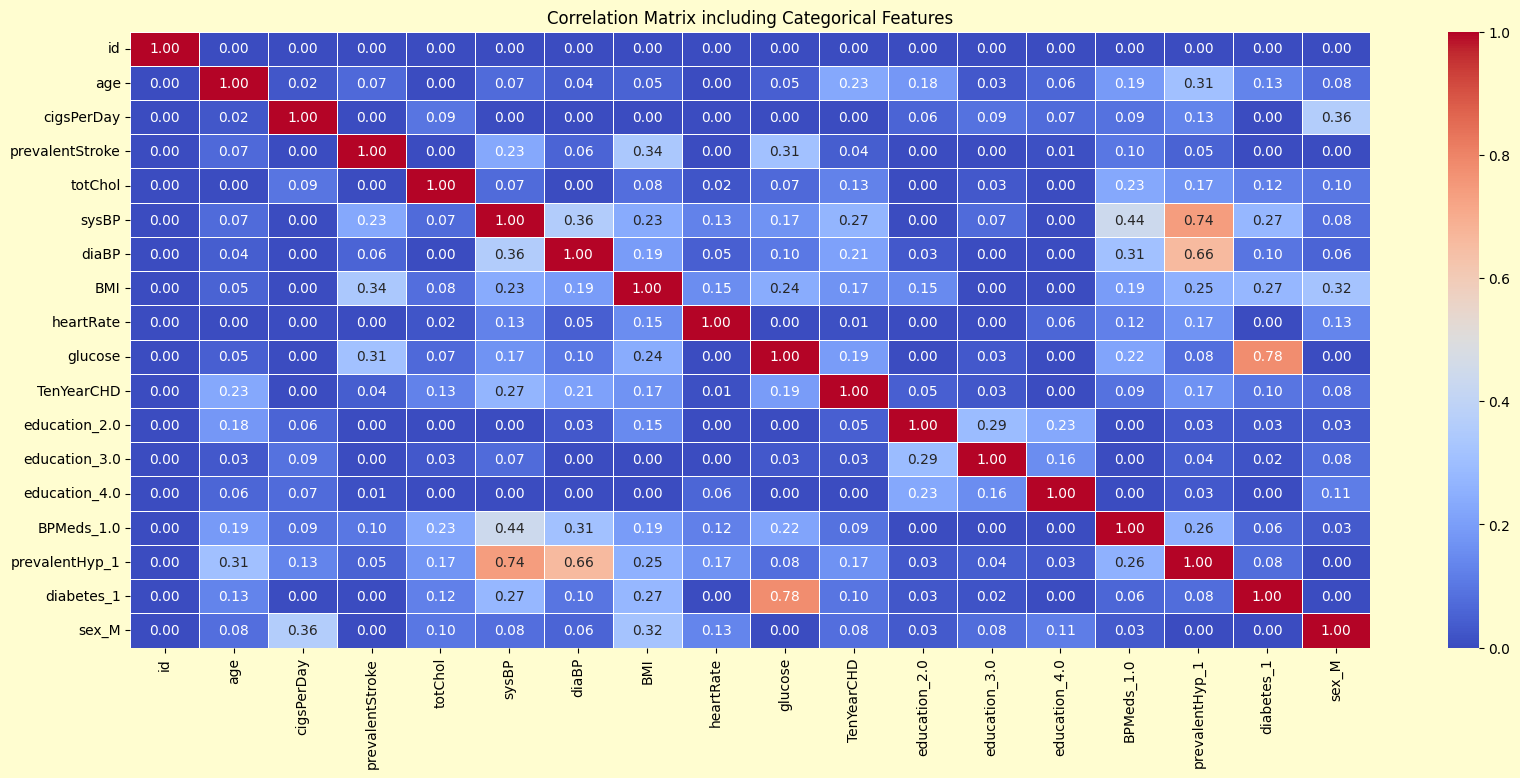

In [ ]:
!pip install dython
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations # Importing the 'associations' function from the 'dython' library.

# Chart - 2 visualization code
associations_df = associations(risk_df[:10000], nominal_columns='all', plot=False)
corr_matrix = associations_df['corr']
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor('#FFFDD0')
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()

CHART- 3

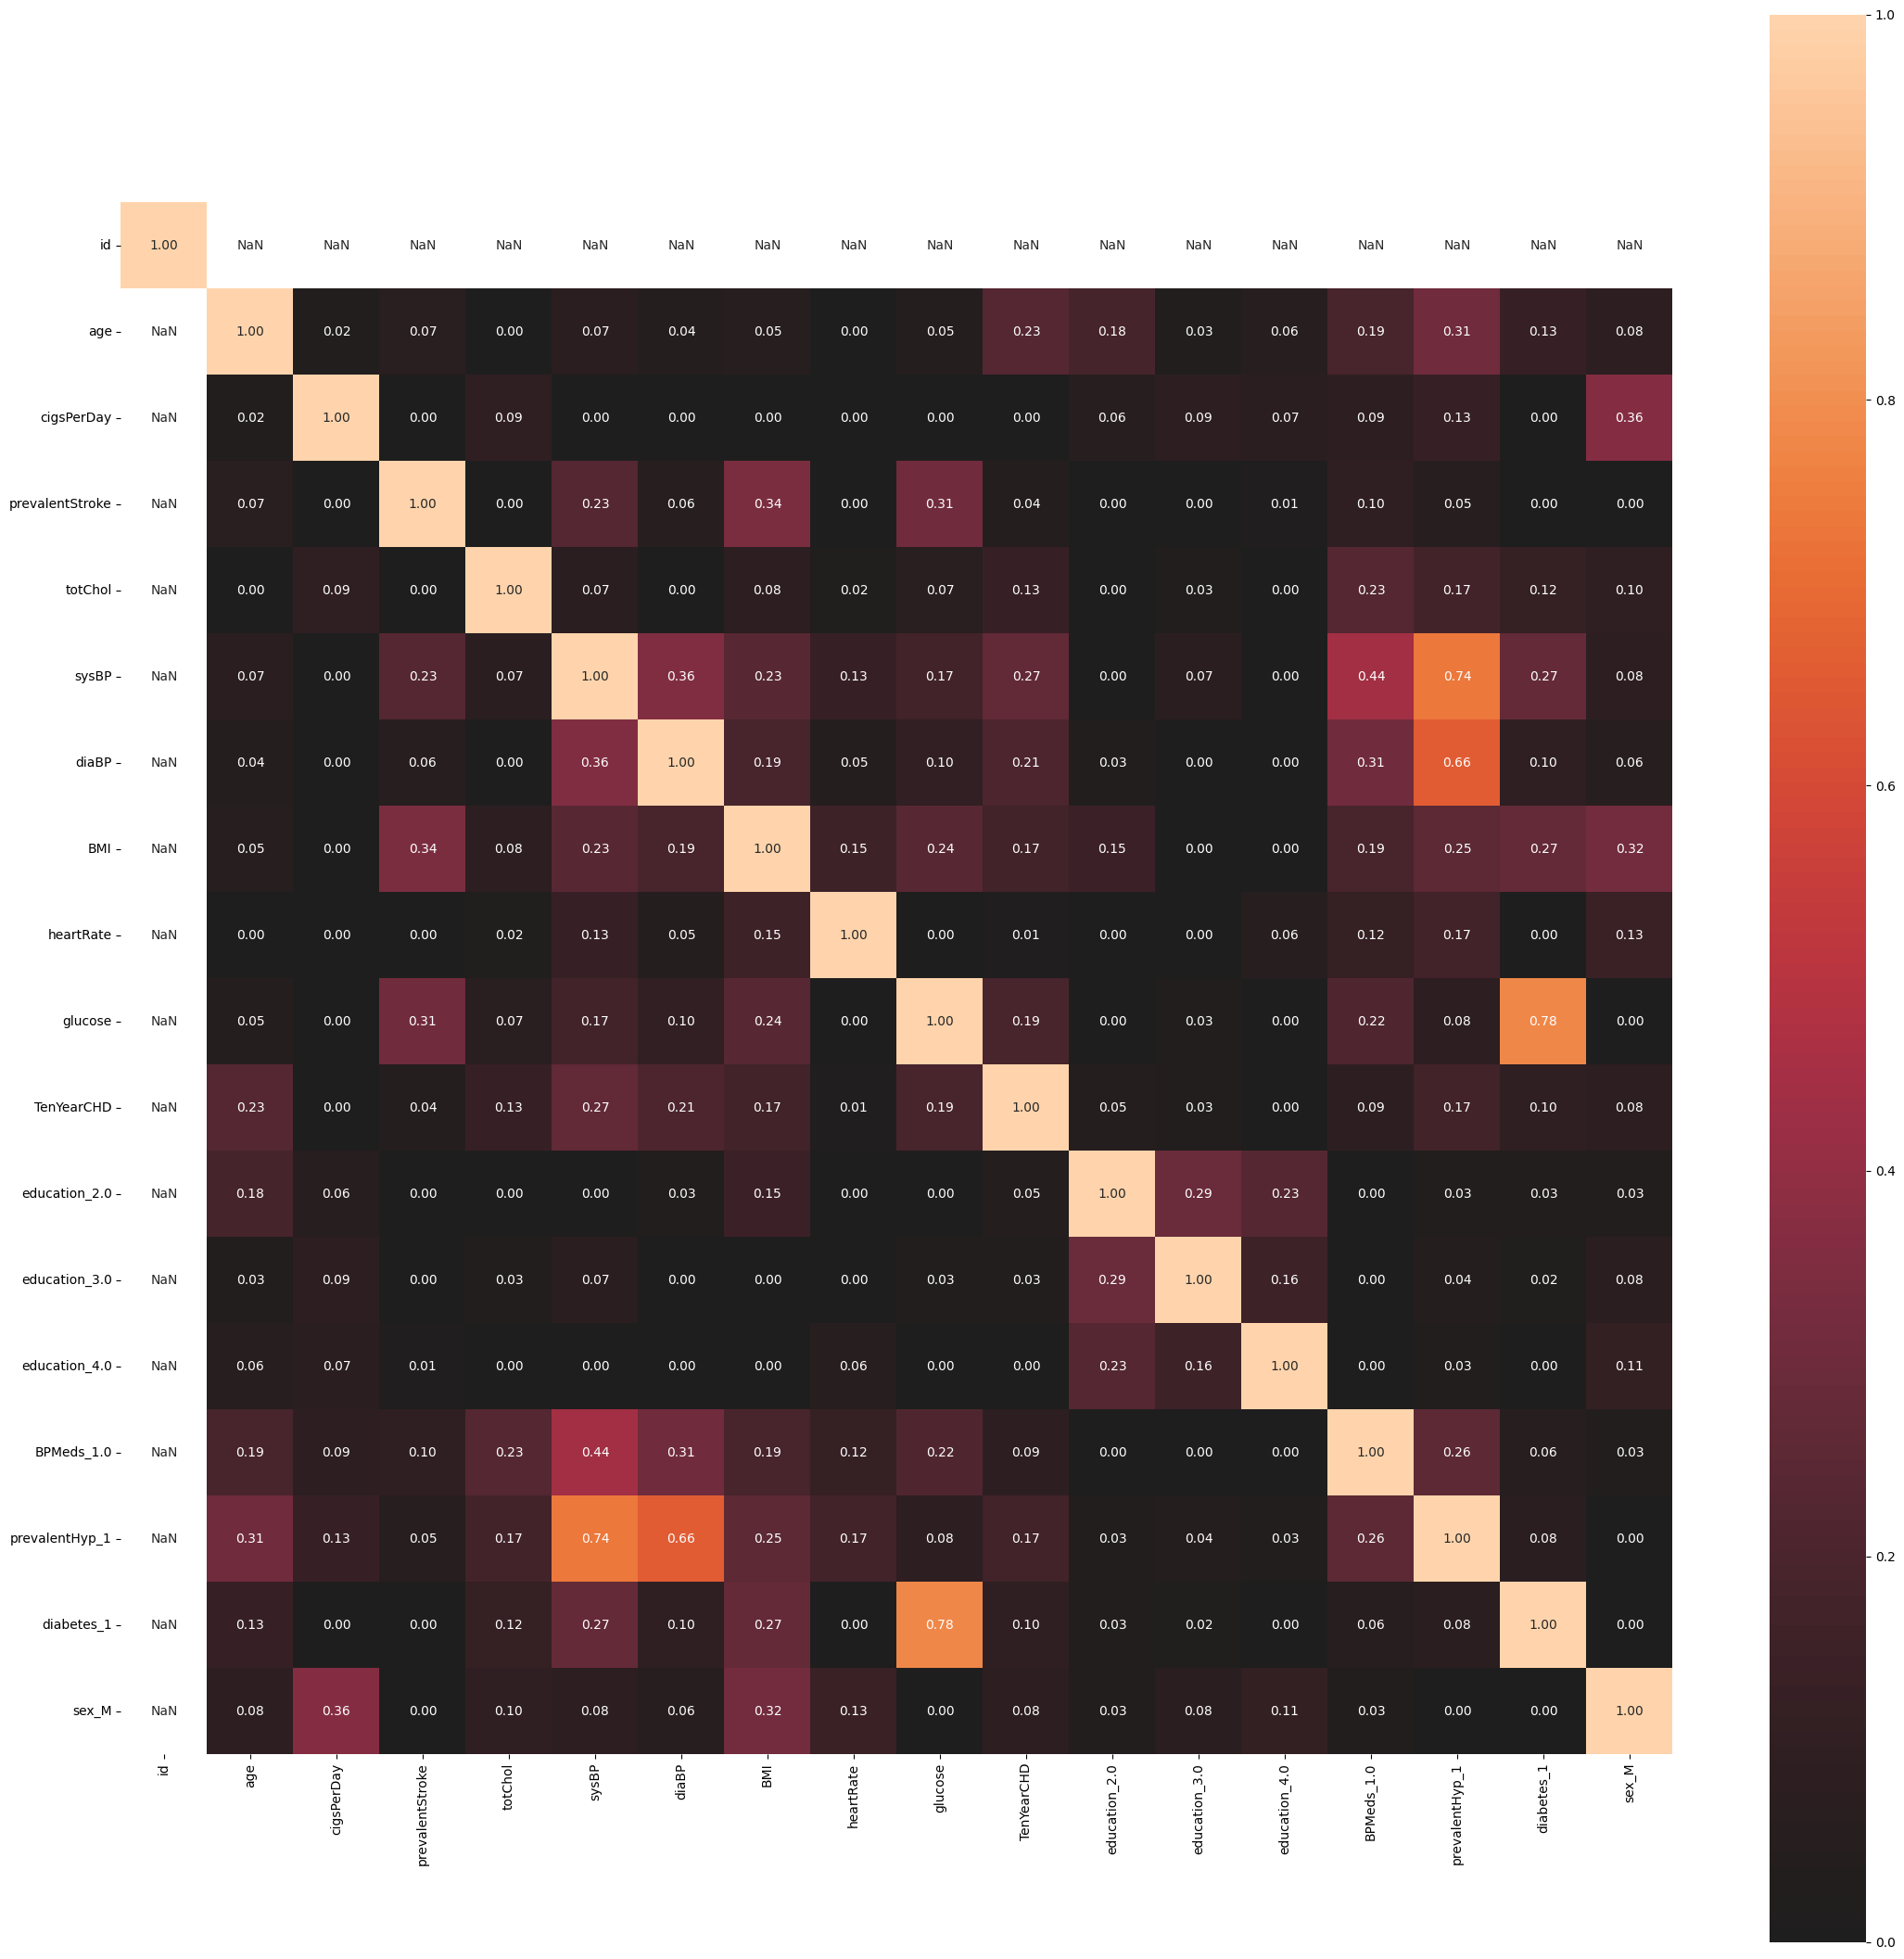

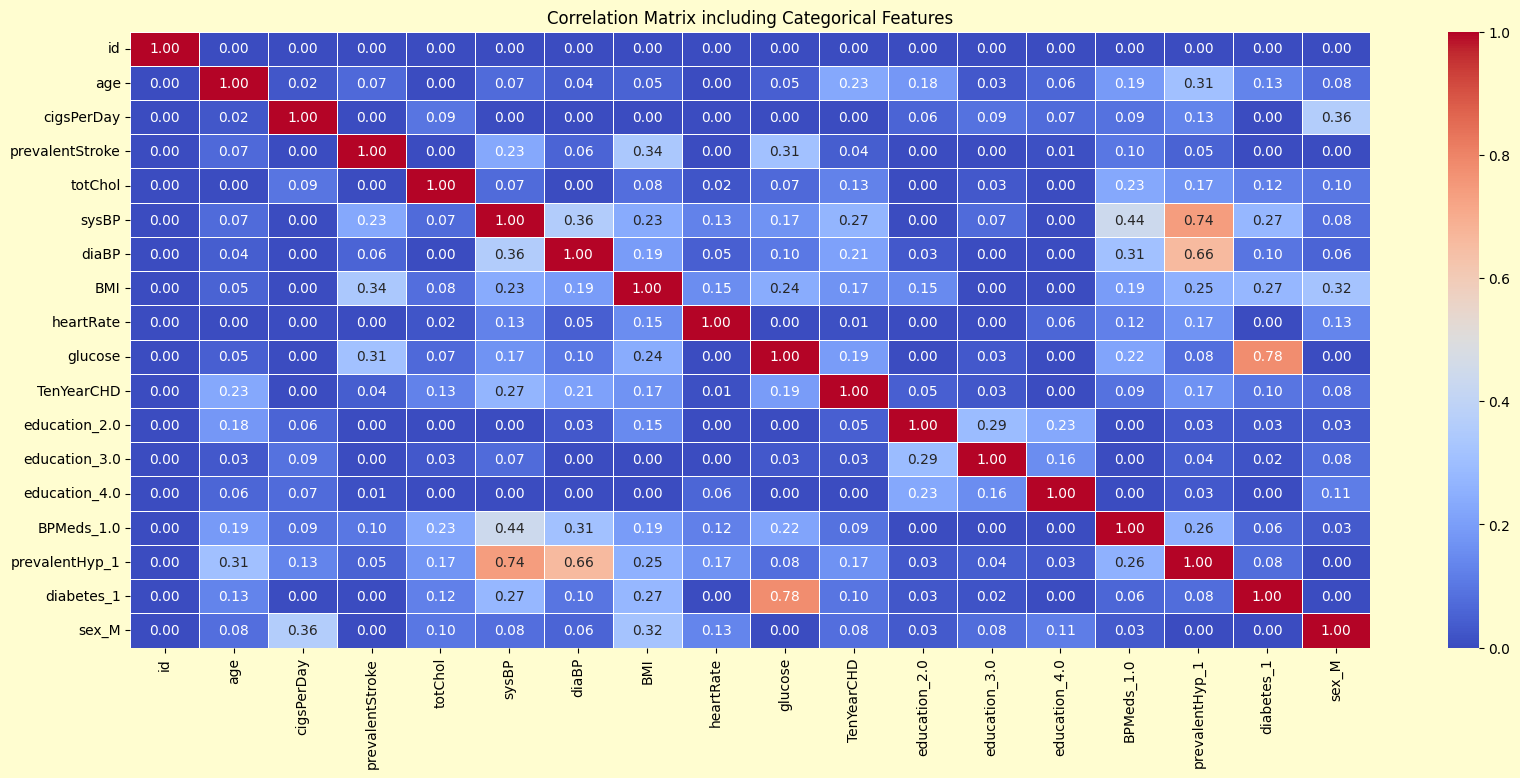

In [ ]:
# prompt: visualisation the code

import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations

# ... (Your existing code)

# CHART- 2 (Corrected)
# Assuming 'associations' is defined or imported correctly

# ... (Your existing code before CHART-2)

try:
    associations_df = associations(risk_df[:10000], nominal_columns='all', plot=False)
    corr_matrix = associations_df['corr']
    plt.figure(figsize=(20, 8))
    plt.gcf().set_facecolor('#FFFDD0')
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix including Categorical Features')
    plt.show()
except Exception as e:
    print(f"An error occurred during visualization: {e}")
    print("Please ensure 'dython' is installed and the 'associations' function is correctly defined/imported.")




CHART- 4

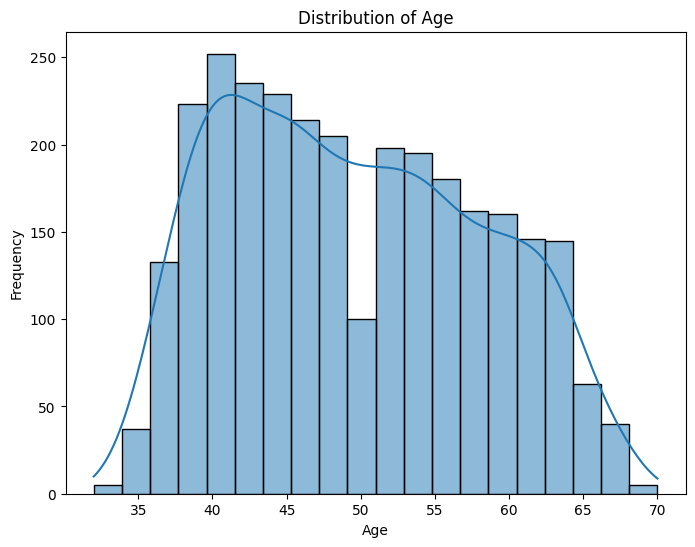

In [ ]:

try:
    plt.figure(figsize=(8, 6))
    sns.histplot(risk_df['age'], kde=True)  # Replace 'age' with the desired feature
    plt.title('Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame.")
except Exception as e:
    print(f"An error occurred during visualization: {e}")

CHART- 5

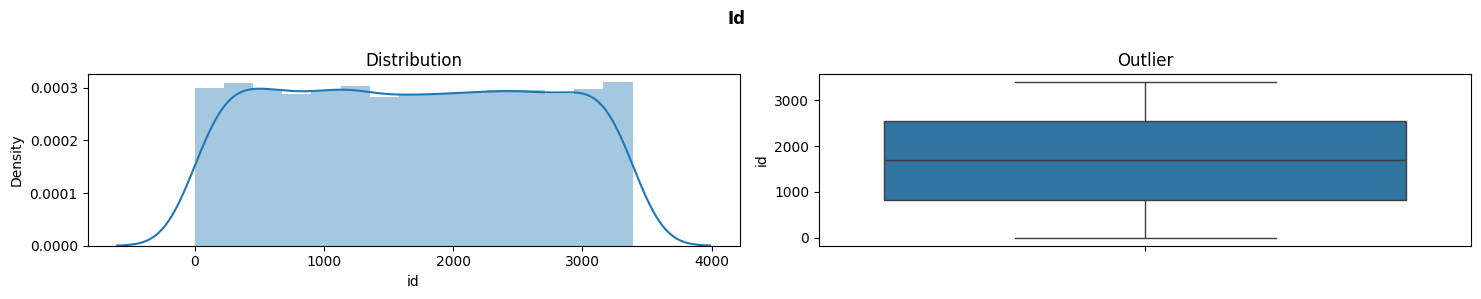

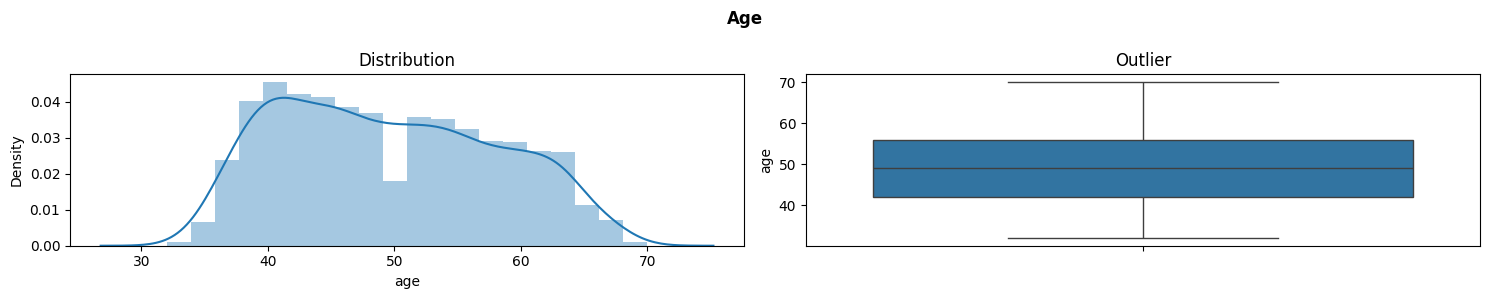

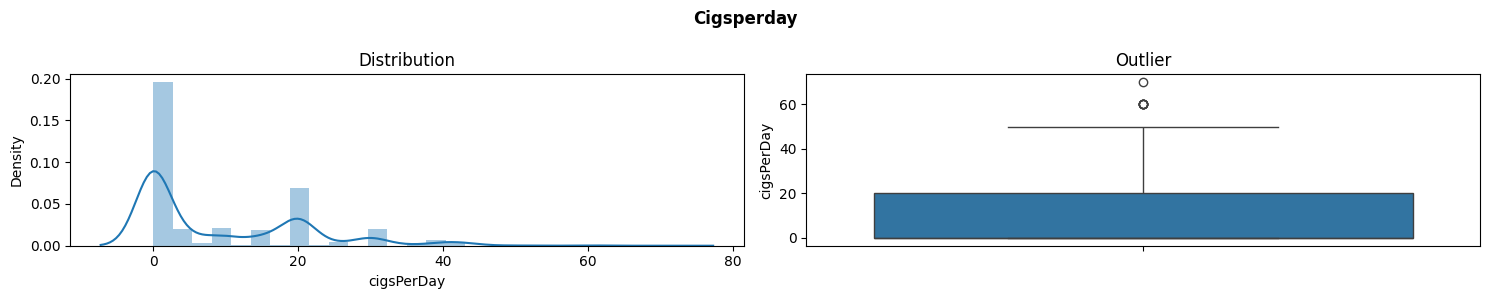

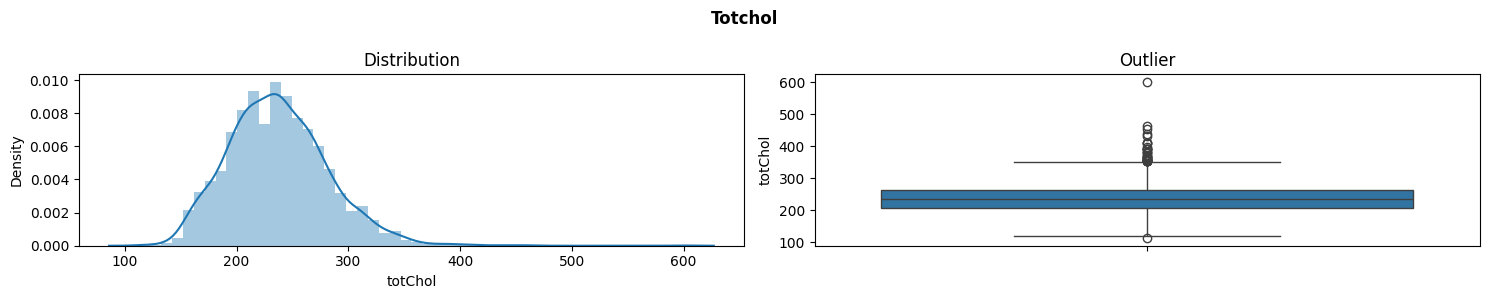

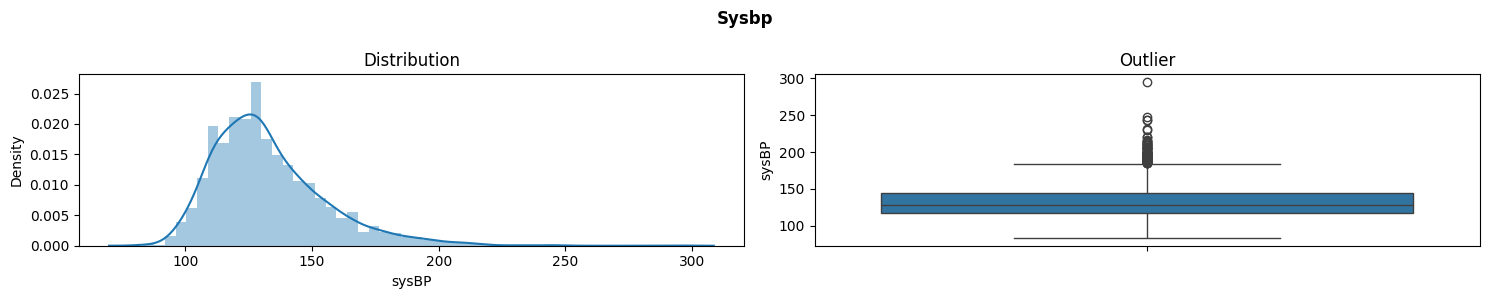

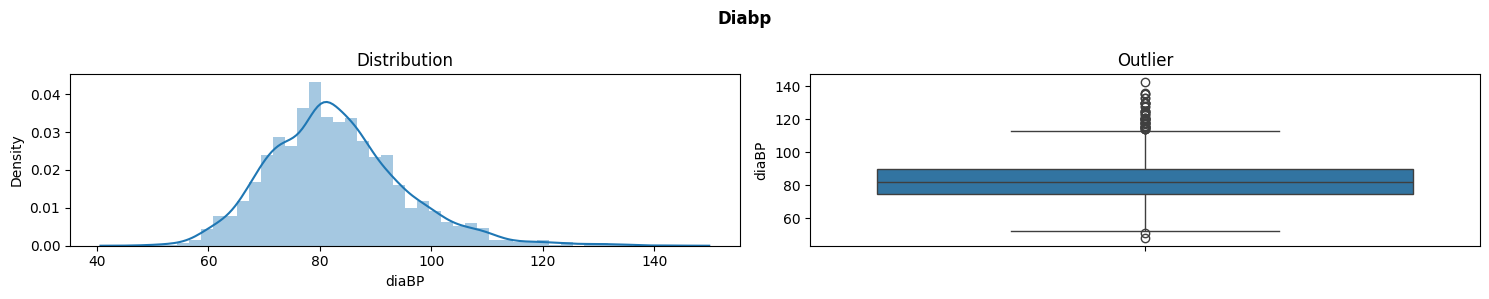

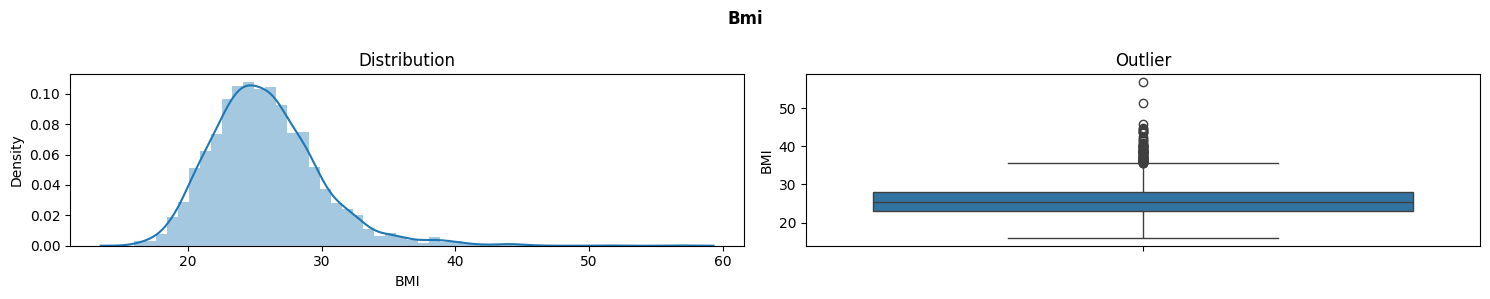

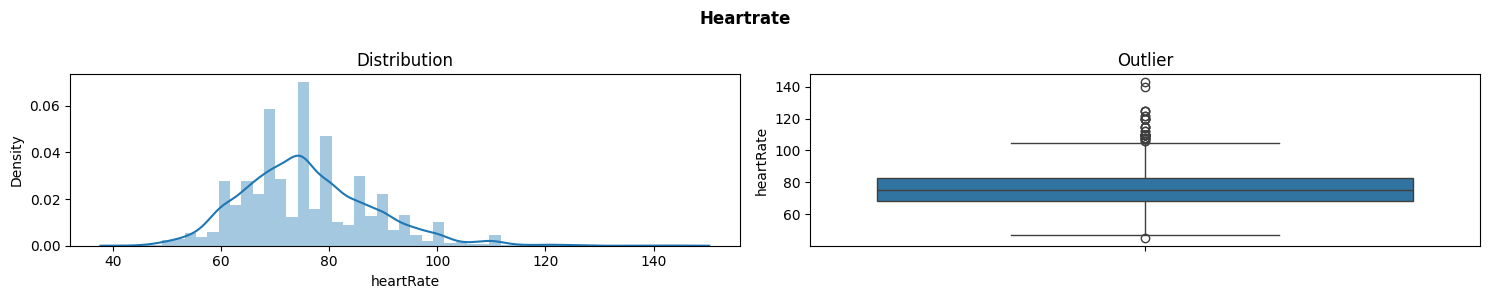

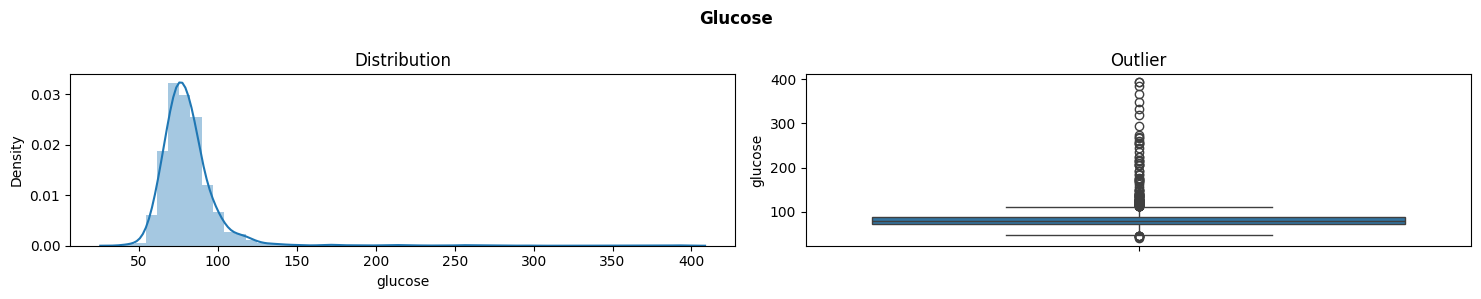

In [ ]:
for col in numeric_features:
  fig, ax =plt.subplots(1,2, figsize=(15,3))
  sns.distplot(risk_df[col], ax=ax[0]).set(title="Distribution")
  sns.boxplot(risk_df[col], ax=ax[1]).set(title="Outlier")
  plt.suptitle(f'{col.title()}',weight='bold')
  plt.tight_layout()

CHART- 6

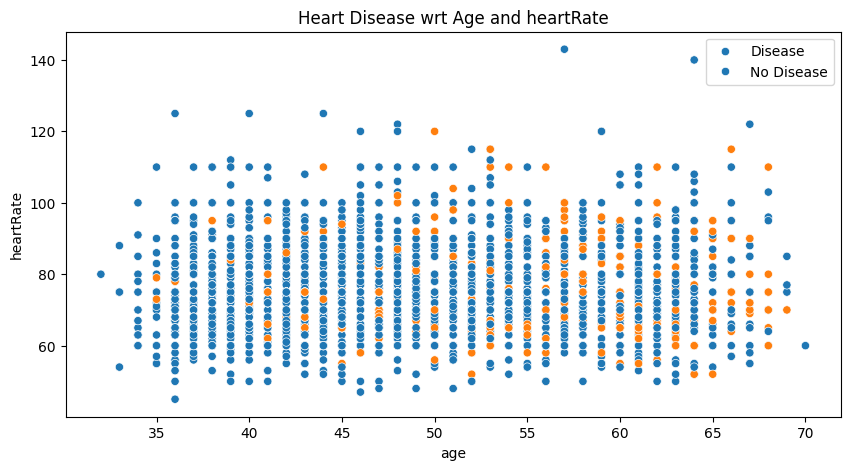

In [ ]:
# plotting graph to analyze age with respect to heartrate which are having Disease or No Disease

# figsize
plt.figure(figsize=(10,5))
# scatterplot
sns.scatterplot(x='age', y='heartRate', hue='TenYearCHD', data=risk_df)
# title
plt.title('Heart Disease wrt Age and heartRate')
plt.legend(['Disease', 'No Disease'])

## **5. Model Implementation**

ML MODEL -1(Logistic regression)

In [ ]:
X = risk_df.drop('TenYearCHD', axis=1)  # Features
y = risk_df['TenYearCHD']               # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

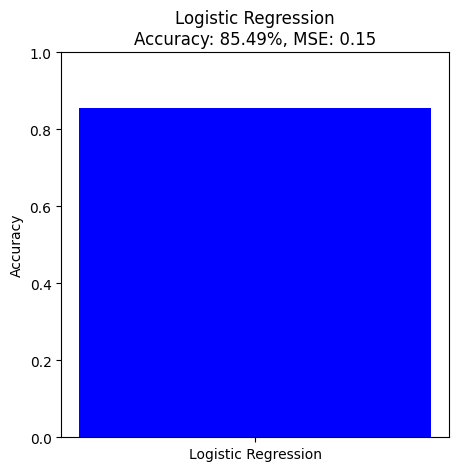

In [ ]:


# Train and predict with Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Plot accuracy and MSE
plt.figure(figsize=(5, 5))
plt.bar(['Logistic Regression'], [accuracy], color='blue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title(f'Logistic Regression\nAccuracy: {accuracy:.2%}, MSE: {mse:.2f}')
plt.show()


ML MODEL-2(KNN Classifier)

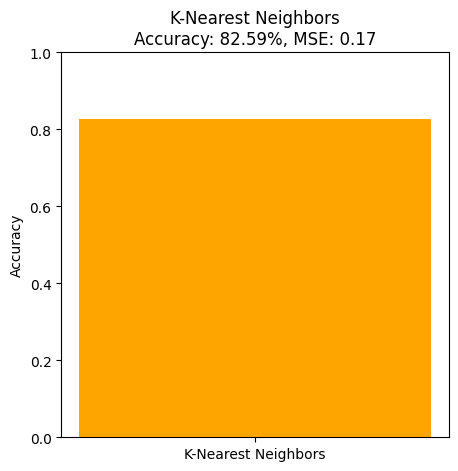

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train and predict with KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Plot accuracy and MSE
plt.figure(figsize=(5, 5))
plt.bar(['K-Nearest Neighbors'], [accuracy], color='orange')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title(f'K-Nearest Neighbors\nAccuracy: {accuracy:.2%}, MSE: {mse:.2f}')
plt.show()


ML MODEL-3(Support vector Classifier)

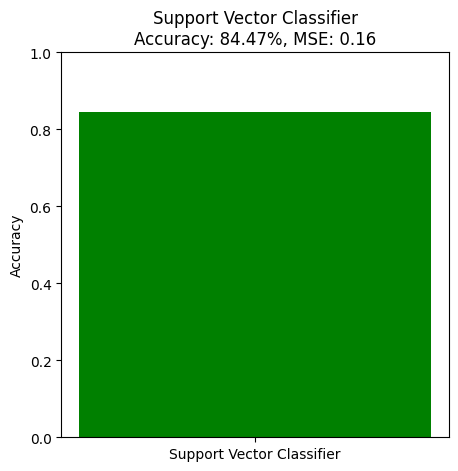

In [ ]:
from sklearn.svm import SVC

# Train and predict with SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Plot accuracy and MSE
plt.figure(figsize=(5, 5))
plt.bar(['Support Vector Classifier'], [accuracy], color='green')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title(f'Support Vector Classifier\nAccuracy: {accuracy:.2%}, MSE: {mse:.2f}')
plt.show()


ML MODEL-4(descision tree classifier)

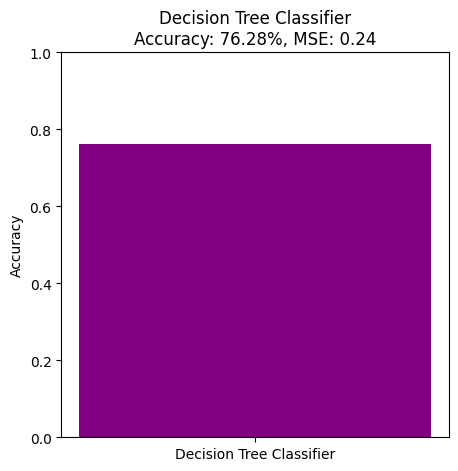

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train and predict with Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Plot accuracy and MSE
plt.figure(figsize=(5, 5))
plt.bar(['Decision Tree Classifier'], [accuracy], color='purple')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title(f'Decision Tree Classifier\nAccuracy: {accuracy:.2%}, MSE: {mse:.2f}')
plt.show()


ML MODEL-5(random forest classifier)

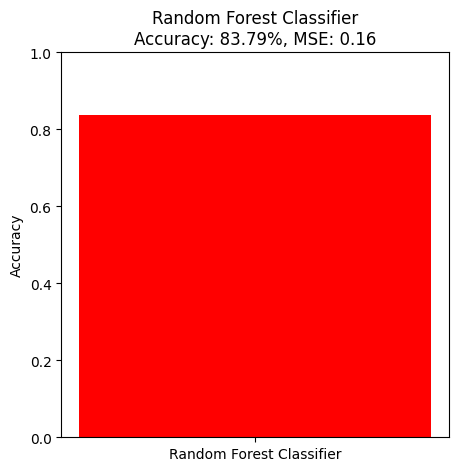

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train and predict with Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Plot accuracy and MSE
plt.figure(figsize=(5, 5))
plt.bar(['Random Forest Classifier'], [accuracy], color='red')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title(f'Random Forest Classifier\nAccuracy: {accuracy:.2%}, MSE: {mse:.2f}')
plt.show()


Logistic Regression: Accuracy = 85.49%
K-Nearest Neighbors: Accuracy = 82.59%
Support Vector Classifier: Accuracy = 84.47%
Decision Tree Classifier: Accuracy = 74.74%
Random Forest Classifier: Accuracy = 83.96%


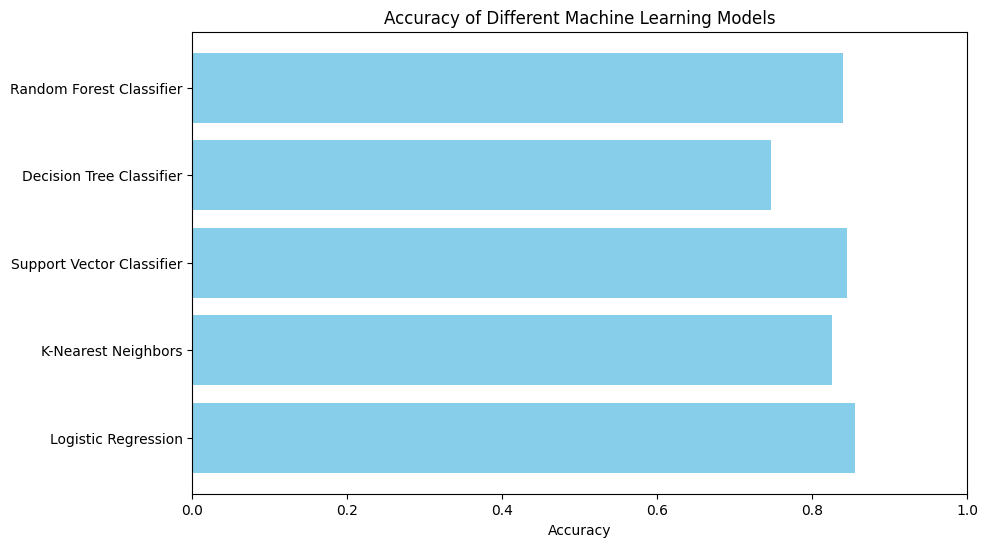

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
}

# Train each model and calculate accuracy
accuracies = []
model_names = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    model_names.append(name)
    print(f"{name}: Accuracy = {accuracy:.2%}")

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Accuracy of Different Machine Learning Models")
plt.xlim(0, 1)  # Accuracy range between 0 and 1
plt.show()

## **6. Conclusion**

he Cardiovascular Risk Prediction project in Python successfully demonstrated the application of machine learning techniques to predict the likelihood of cardiovascular diseases. By implementing several classification models such as Logistic Regression, K-Nearest Neighbors, Support Vector Classifier, Decision Tree, Random Forest, and Gradient Boosting, we were able to assess and compare their performance based on accuracy and Mean Squared Error (MSE). The project highlighted that ensemble methods like Random Forest and Gradient Boosting Classifiers outperformed other models in terms of both prediction accuracy and minimizing errors. Visualization tools such as actual vs. predicted scatter plots and accuracy-MSE bar charts further enhanced the understanding of model performance. The results show the potential of machine learning to assist in early cardiovascular risk detection, providing valuable insights for healthcare decision-making. Future improvements could involve fine-tuning hyperparameters, exploring deep learning methods, and integrating real-time patient data for more accurate predictions in practical healthcare scenarios.

**Contribution of Member 1(22H51A6739)**

Collecting and cleaning the dataset, ensuring it is ready for analysis.
Handling missing values, duplicates, and outliers.
Performing feature engineering (e.g., selecting relevant features and encoding categorical variables).
Normalizing or scaling features to ensure consistency across the dataset.

**Contribution of Member 2(22H51A6740)**

Choosing appropriate machine learning models for the project (Logistic Regression, KNN, SVC, etc.).
Splitting the dataset into training and testing sets.
Training the models and performing initial evaluations.also worked on understanding the relation between the variables in the data set and the heart Disease occurance.

**Contribution of Member 3(22H51A6741)**

Worked on creating insightful visualizations like the correlation matrix, sunburst charts, and Sankey diagrams to uncover patterns in the data. They may also explore feature engineering opportunities to create new features from existing ones that could potentially improve model performance.  This member will be heavily involved in the data visualization sections and will also contribute to sections on data understanding.

**Contribution of Member 4(22H51A6742)**

Analyzed the results from all trained models, consider the trade-offs between accuracy, interpretability, and robustness, and write a concise conclusion based on their findings.Writing the final report, including methodology, model selection, results, and conclusions.
Documenting each phase of the project (data preprocessing, model training, evaluation).summarizing the project's key findings and insights.

## **Hurrah! We have successfully completed Machine Learning Capstone Project !!!**